# Ejemplo de prueba 


https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html


X contiene las noticias, pero quiero ver en qué formato


In [1]:
# Parallelizing using Pool.apply()

import multiprocessing as mp

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
X, _ = make_multilabel_classification(random_state=0)

print(X)
print(X.shape)

lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)
lda.transform(X[-2:])

[[3. 1. 4. ... 4. 1. 3.]
 [5. 0. 6. ... 0. 0. 3.]
 [3. 4. 1. ... 3. 2. 5.]
 ...
 [2. 1. 2. ... 1. 0. 3.]
 [6. 4. 1. ... 1. 3. 5.]
 [2. 4. 2. ... 5. 4. 2.]]
(100, 20)


array([[0.00360392, 0.25499205, 0.0036211 , 0.64236448, 0.09541846],
       [0.15297572, 0.00362644, 0.44412786, 0.39568399, 0.003586  ]])

Vale, parece que X es un array de numpy, que contiene 100 filas con 20 columnas cada uno: un vector fila por cada noticia, que contiene el conteo de veces que aparece cada palabra (de un total de 20 palabras). Esto es lo que se llama "Bag Of Words"

En nuestro caso tenemos que coger todas las noticias, eliminar las palabras te tipo "stopwords" (palabras como "de", "la", "un", ...) y hacernos una lista con todas las palabras únicas que aparecen en el conjunto de todas las noticias (que serán más de 20 seguro, pero bueno).

## Leer y limpiar csv

In [1]:
import pandas as pd

df = pd.DataFrame()
for chunk in pd.read_csv('Noticias_Dataset_IDANAE_latin1.csv', encoding='latin1',sep=';', chunksize=1000, nrows=69000):
    df = pd.concat([df, chunk], ignore_index=True)
    
#df = pd.read_csv("noticias_todo_url.csv", error_bad_lines = False, nrows=35000, chunksize=1000)
# df = pd.read_csv("Noticias_Dataset_IDANAE_latin1.csv", encoding='latin1', sep=';', dtype=object; error_bad_lines = False)
#df['CUERPO SCRAPEADO'] = df['Text']
print(df.shape)
df.head()

(68710, 5)


,mentionUrl,PERIODO,CUERPO SCRAPEADO,TITULO SCRAPEADO,FECHA SCRAPING
0,http://www.efeemprende.com/noticia/airestudio-...,4T2015,"Airestudio y Lascaray, han sido galardonadas c...","Airestudio y Lascaray, premios Álava Emprende ...",0
1,http://www.alimarket.es/noticia/192595/Lascara...,3T2015,NaN,NaN,NaN
2,http://www.deia.com/2017/11/10/economia/lascar...,4T2017,"por su ""tesón empresarial""\n\nEP - Viernes, 10...","Lascaray, Ceballos,Garmendia y Palacios, premi...",10/11/2017
3,http://www.interempresas.net/MetalMecanica/Art...,2T2016,Conocer los medios productivos y optimizarlos ...,Intermaher presenta su nuevo centro de formación,0
4,https://www.interempresas.net/Agricola/Articul...,1T2018,"Pabellón 3, stand C-D /5-10\n\nTras diversas p...",FIMA 2018: Casamayor Librada amplia su gama de...,0


In [2]:
import datetime
# len(df['FECHA SCRAPING'].unique())
len(df['FECHA SCRAPING'].unique())

#Eliminar fechas 0 o nulas
df = df[df['FECHA SCRAPING'] != '0']
df = df[df['FECHA SCRAPING'].notna()]
df = df[df['CUERPO SCRAPEADO'].notna()]

df['Date']= pd.to_datetime(df['FECHA SCRAPING'],format="%d/%m/%Y")
df=df[(df['Date']<datetime.datetime(2020,1,1))]
df=df[(df['Date']>datetime.datetime(2015,1,1))]
#df.sort_values(by=['Date'])
df.shape


(33337, 6)

In [3]:
df.iloc[2]['CUERPO SCRAPEADO']

'Sábado, 6 de Mayo de 2017 - Actualizado a las 06:15h\n\nVitoria-La nueva concesión de la línea de autobús Bilbao-Logroño comenzará a operar el lunes con \x93una mejora del servicio, más frecuencias, y una reducción significativa del precio del billete\x94, según informó ayer la Diputación. La tarifa básica disminuirá alrededor del 25%, y las personas usuarias podrán acceder a descuentos adicionales a través de la tarjeta BAT, la adquisición de billete de ida y vuelta, y otros conceptos. La nueva concesión ha sido adjudicada a la empresa Autobuses Cuadra por un periodo de diez años.\n\nLa línea Bilbao-Logroño une estas dos localidades por autopista con parada intermedia en Haro y presta servicio también en determinados horarios a un buen número de localidades de la comarca de Rioja Alavesa como Labastida, Samaniego, Laguardia y Assa, y otras limítrofes a esta comarca como Zambrana. También tiene parada en el Hospital de Leza y en los municipios de San Vicente de la Sonsierra, Briñas y 

In [3]:
# eliminar caracteres extraños
df['CUERPO SCRAPEADO'] = df['CUERPO SCRAPEADO'].str.replace('\x93','')
df['CUERPO SCRAPEADO'] = df['CUERPO SCRAPEADO'].str.replace('\x94','')
df['CUERPO SCRAPEADO'] = df['CUERPO SCRAPEADO'].str.replace('\n',' ')
# Remove Emails
df['CUERPO SCRAPEADO'] = df['CUERPO SCRAPEADO'].str.replace('\S*@\S*\s?', '')

# Remove new line characters
df['CUERPO SCRAPEADO'] = df['CUERPO SCRAPEADO'].str.replace('\s+', ' ')

# Remove distracting single quotes
df['CUERPO SCRAPEADO'] = df['CUERPO SCRAPEADO'].str.replace("\'", "")

noticia1 = df.iloc[2]['CUERPO SCRAPEADO']
noticia1

'Sábado, 6 de Mayo de 2017 - Actualizado a las 06:15h Vitoria-La nueva concesión de la línea de autobús Bilbao-Logroño comenzará a operar el lunes con una mejora del servicio, más frecuencias, y una reducción significativa del precio del billete, según informó ayer la Diputación. La tarifa básica disminuirá alrededor del 25%, y las personas usuarias podrán acceder a descuentos adicionales a través de la tarjeta BAT, la adquisición de billete de ida y vuelta, y otros conceptos. La nueva concesión ha sido adjudicada a la empresa Autobuses Cuadra por un periodo de diez años. La línea Bilbao-Logroño une estas dos localidades por autopista con parada intermedia en Haro y presta servicio también en determinados horarios a un buen número de localidades de la comarca de Rioja Alavesa como Labastida, Samaniego, Laguardia y Assa, y otras limítrofes a esta comarca como Zambrana. También tiene parada en el Hospital de Leza y en los municipios de San Vicente de la Sonsierra, Briñas y Ábalos. La ren

## Procesar noticias


https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

https://machinelearningmastery.com/clean-text-machine-learning-python/


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
import gensim

#nltk.download('stopwords')  # Esto solo hay que hacerlo una vez cuando instalas nltk
#nltk.download('punkt')  # lo mismo

STOP_WORDS_SPANISH = stopwords.words('spanish')
#stemmer = SnowballStemmer('spanish')

#Tokenizar
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df['CUERPO SCRAPEADO']))

print(data_words[:1])

#def tokenizar_noticia(txt):
#    if pd.isnull(txt):
#        return []
#    tokens = word_tokenize(txt)
#    tokens = [w for w in tokens if not w.lower() in STOP_WORDS_SPANISH] 
#    words = [word for word in tokens if word.isalpha()]
#    stemmed_words = [stemmer.stem(i) for i in words] # esto tengo mis dudas de si es bueno o malo
#    return stemmed_words
#tokens1 = tokenizar_noticia(noticia1)
#print(tokens1)

[['por', 'su', 'teson', 'empresarial', 'ep', 'viernes', 'de', 'noviembre', 'de', 'actualizado', 'las', 'los', 'premios', 'joxe', 'mari', 'korta', 'seran', 'en', 'su', 'edicion', 'para', 'felix', 'lascaray', 'martin', 'ceballos', 'antxon', 'garmendia', 'juan', 'felix', 'palacios', 'por', 'su', 'teson', 'empresarial', 'segun', 'ha', 'informado', 'el', 'departamento', 'de', 'desarrollo', 'economico', 'gasteiz', 'el', 'lehendakari', 'inigo', 'urkullu', 'entregara', 'los', 'premios', 'joxe', 'mari', 'korta', 'el', 'proximo', 'de', 'noviembre', 'en', 'un', 'acto', 'de', 'reconocimiento', 'que', 'reunira', 'los', 'principales', 'agentes', 'del', 'mundo', 'empresarial', 'de', 'euskadi', 'este', 'ano', 'el', 'jurado', 'reconoce', 'el', 'teson', 'empresarial', 'de', 'personas', 'que', 'han', 'liderado', 'sectores', 'tan', 'diversos', 'como', 'la', 'cosmetica', 'oleoquimica', 'la', 'automocion', 'los', 'plasticos', 'la', 'maquina', 'herramienta', 'los', 'galardonados', 'son', 'felix', 'lascaray',

In [5]:
#Para buscar palabras que van juntas

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
#trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

print(bigram_mod[data_words[0]])

['por', 'su', 'teson', 'empresarial', 'ep', 'viernes', 'de', 'noviembre', 'de', 'actualizado', 'las', 'los', 'premios', 'joxe_mari', 'korta', 'seran', 'en', 'su', 'edicion', 'para', 'felix', 'lascaray', 'martin', 'ceballos', 'antxon', 'garmendia', 'juan', 'felix', 'palacios', 'por', 'su', 'teson', 'empresarial', 'segun', 'ha', 'informado', 'el', 'departamento', 'de', 'desarrollo', 'economico', 'gasteiz', 'el', 'lehendakari_inigo', 'urkullu', 'entregara', 'los', 'premios', 'joxe_mari', 'korta', 'el', 'proximo', 'de', 'noviembre', 'en', 'un', 'acto', 'de', 'reconocimiento', 'que', 'reunira', 'los', 'principales', 'agentes', 'del', 'mundo', 'empresarial', 'de', 'euskadi', 'este', 'ano', 'el', 'jurado', 'reconoce', 'el', 'teson', 'empresarial', 'de', 'personas', 'que', 'han', 'liderado', 'sectores', 'tan', 'diversos', 'como', 'la', 'cosmetica', 'oleoquimica', 'la', 'automocion', 'los', 'plasticos', 'la', 'maquina_herramienta', 'los', 'galardonados', 'son', 'felix', 'lascaray', 'de', 'lea',

In [9]:
print(len(data_words))

33337


In [6]:
# tokenizar todas las noticias
#noticias = df['CUERPO SCRAPEADO'].tolist()
#print(len(noticias))

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Eliminar stopwords, hacer biagramas y lematizar
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in STOP_WORDS_SPANISH] for doc in texts]


def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#noticias_tokens = [tokenizar_noticia(noticia1) for noticia1 in noticias]
#noticias_tokens= []
#for i, noticia in enumerate(noticias):
#    if i%1000==0:
#        print(i)
#    noticias_tokens.append(tokenizar_noticia(noticia))

#print(noticias_tokens[:10])

In [7]:
# Step 1: Init multiprocessing.Pool()
#pool = mp.Pool(mp.cpu_count())

# Step 2: `pool.apply` the `howmany_within_range()`
#results = [pool.apply(howmany_within_range, args=(row, 4, 8)) for row in data]

# Step 3: Don't forget to close
#pool.close()


# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)


# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'es' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('es_core_news_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['empresarial', 'viernes', 'noviembre', 'actualizar', 'premio', 'seran', 'empresarial', 'informar', 'desarrollar', 'economico', 'urkullu', 'premio', 'proximo', 'noviembre', 'acto', 'reconocimiento', 'reunira', 'principal', 'agente', 'mundo', 'empresarial', 'empresarial', 'personar', 'liderar', 'sector', 'tan', 'cosmetica', 'oleoquimica', 'plasticos', 'maquina_herramienta', 'galardonar', 'leer', 'proponer', 'martin', 'ceballos', 'marel', 'proponer', 'gestam', 'jurar', 'presidir', 'consejero', 'desarrollar', 'tapiar', 'formar', 'representante', 'empresarial', 'querer', 'agradecer', 'trabajar', 'realizar', 'personar', 'cursar', 'vez', 'finalizar', 'estudio', 'universitario', 'negociar', 'familiar', 'empresa', 'fundar', 'industriar', 'larga_trayectoria', 'antiguo', 'arar', 'largar', 'casi', 'ano', 'diversificar', 'actividad', 'adaptandose', 'avances_tecnologicos', 'evolucionar', 'tendencia', 'mercar', 'actualidad', 'mantener', 'grande', 'negocio', 'cosmetica', 'oleoquimica', 'centrar', 'd

In [11]:
print(len(data_lemmatized))

33337


In [8]:
# crear diccionario o lista de palabras unicas: words_index
from collections import Counter

#words_index = []
#for tokens in noticias_tokens:
 #   for w in tokens:
  #      if w not in words_index:
   #         words_index.append(w)
#words_index= Counter(set([w for tokens in noticias_tokens for w in tokens])).most_common(500)

counter = Counter() 
for tokens in data_lemmatized:
    for w in tokens:    
        counter.update([w])
     

#print(words_index[:5000])
print(len(counter))
counter.most_common(1000)

62352


[('millón', 77807),
 ('empresa', 66206),
 ('euro', 58429),
 ('nuevo', 50399),
 ('ano', 41101),
 ('pasar', 25298),
 ('tambien', 24719),
 ('mercar', 24324),
 ('venta', 23565),
 ('contar', 22668),
 ('grupo', 22431),
 ('hacer', 21649),
 ('espana', 21471),
 ('partir', 20914),
 ('producto', 18536),
 ('ademar', 18395),
 ('mas', 17872),
 ('firmar', 16280),
 ('trabajar', 15551),
 ('servicio', 15467),
 ('cliente', 14933),
 ('dar', 14907),
 ('marcar', 14851),
 ('crecimiento', 14779),
 ('sector', 14480),
 ('emplear', 13245),
 ('comprar', 13101),
 ('formar', 13000),
 ('primero', 12990),
 ('segun', 12946),
 ('negociar', 12829),
 ('mejorar', 12678),
 ('desarrollar', 12612),
 ('mayor', 12473),
 ('poner', 12440),
 ('presentar', 12206),
 ('explicar', 11725),
 ('director', 11513),
 ('ahora', 11405),
 ('realizar', 11387),
 ('suponer', 10745),
 ('personar', 10674),
 ('mesar', 10525),
 ('trabajador', 10339),
 ('presidente', 10305),
 ('compania', 10287),
 ('capital', 10152),
 ('solo', 9951),
 ('acordar', 994

In [9]:
words_index=[t[0] for t in counter.most_common(1000)]
words_index

['millón',
 'empresa',
 'euro',
 'nuevo',
 'ano',
 'pasar',
 'tambien',
 'mercar',
 'venta',
 'contar',
 'grupo',
 'hacer',
 'espana',
 'partir',
 'producto',
 'ademar',
 'mas',
 'firmar',
 'trabajar',
 'servicio',
 'cliente',
 'dar',
 'marcar',
 'crecimiento',
 'sector',
 'emplear',
 'comprar',
 'formar',
 'primero',
 'segun',
 'negociar',
 'mejorar',
 'desarrollar',
 'mayor',
 'poner',
 'presentar',
 'explicar',
 'director',
 'ahora',
 'realizar',
 'suponer',
 'personar',
 'mesar',
 'trabajador',
 'presidente',
 'compania',
 'capital',
 'solo',
 'acordar',
 'plantilla',
 'destacar',
 'ejercicio',
 'actividad',
 'gran',
 'comercial',
 'principal',
 'decir',
 'resultar',
 'vez',
 'aumentar',
 'llegar',
 'alcanzar',
 '\ufeff1',
 'abrir',
 'centrar',
 'cerrar',
 'plantar',
 'mantener',
 'proyectar',
 'total',
 'ofrecer',
 'internacional',
 'anunciar',
 'permitir',
 'tienda',
 'importante',
 'hoy',
 'publicar',
 'accionar',
 'asegurar',
 'procesar',
 'informar',
 'general',
 'incrementar'

In [10]:
# convertir nuestras noticias a Bag of Words
import numpy as np
from scipy.sparse import csr_matrix
def convert_to_bow(noticias, words_index):
    n_noticias = len(noticias)
    n_words = len(words_index)
    X = np.zeros((n_noticias, n_words))  # crear matriz inicialmente a cero 
    for i, noticia in enumerate(noticias):
        for word in noticia:
            if word in words_index:
                j = words_index.index(word)
                X[i,j] += 1
    return X

def convert_to_bow_sparse(noticias, words_index):
    row = []
    col = []
    data = []
    for i, noticia in enumerate(noticias):
        for word in noticia:
            if word in words_index:
                j = words_index.index(word)
                row.append(i)
                col.append(j)
                data.append(1)
    return csr_matrix((data, (row, col)), shape=(len(noticias), len(words_index)))
    
    
    
X = convert_to_bow_sparse(data_lemmatized, words_index)

print(X.shape)

print(X)

print(X[1], data_lemmatized[1])

(33337, 1000)
  (0, 0)	2
  (0, 1)	8
  (0, 2)	1
  (0, 3)	6
  (0, 4)	8
  (0, 5)	1
  (0, 6)	4
  (0, 7)	2
  (0, 9)	1
  (0, 13)	1
  (0, 16)	2
  (0, 18)	3
  (0, 20)	2
  (0, 21)	4
  (0, 23)	3
  (0, 24)	4
  (0, 25)	1
  (0, 26)	1
  (0, 27)	4
  (0, 28)	1
  (0, 30)	2
  (0, 32)	5
  (0, 34)	2
  (0, 37)	1
  (0, 39)	1
  :	:
  (33336, 23)	1
  (33336, 24)	1
  (33336, 27)	1
  (33336, 29)	1
  (33336, 33)	1
  (33336, 36)	1
  (33336, 40)	1
  (33336, 131)	1
  (33336, 143)	3
  (33336, 229)	1
  (33336, 234)	1
  (33336, 276)	1
  (33336, 283)	1
  (33336, 296)	1
  (33336, 315)	1
  (33336, 359)	1
  (33336, 373)	1
  (33336, 416)	1
  (33336, 469)	1
  (33336, 511)	1
  (33336, 520)	1
  (33336, 523)	1
  (33336, 612)	1
  (33336, 894)	1
  (33336, 992)	1
  (0, 0)	1
  (0, 4)	1
  (0, 7)	1
  (0, 10)	1
  (0, 28)	2
  (0, 36)	1
  (0, 41)	1
  (0, 49)	1
  (0, 59)	1
  (0, 60)	1
  (0, 88)	1
  (0, 171)	1
  (0, 185)	1
  (0, 194)	1
  (0, 270)	1
  (0, 272)	1
  (0, 287)	1
  (0, 332)	2
  (0, 364)	2
  (0, 415)	1
  (0, 433)	1
  (0, 540)	1

## Latent Dirichlet Allocation

In [11]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification

lda = LatentDirichletAllocation(n_jobs=10,n_components=20, random_state=0)
lda.fit(X)

matriz_topics = lda.transform(X)
samples=lda.decision_function(X)
acurracy = lda.score(X)
columna_nueva_fecha=np.array(df['FECHA SCRAPING'])
X_final = np.column_stack((columna_nueva_fecha,matriz_topics)) 

print(score)
print(samples)
print(lda.transform(X[:17]))


AttributeError: 'LatentDirichletAllocation' object has no attribute 'decision_function'

In [65]:
#pd.DataFrame(X_final).to_csv('MatrizFrecuencia_LDA_index_fecha.csv',sep=',',header=None)

df_final=pd.DataFrame(matriz_topics,dtype='float')
df_final['FECHA']= columna_nueva_fecha
#df_final.insert(0, 'id', df_final.index)
#df_final.rename(columns={'Unnamed: 0':'ID', 0: 'FECHA'}, inplace=True)
df_final

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,FECHA
0,0.000195,0.000195,0.062101,0.173411,0.000195,0.231581,0.000195,0.046809,0.127760,0.101030,...,0.000195,0.000195,0.000195,0.000195,0.000195,0.000195,0.072175,0.069843,0.113149,10/11/2017
1,0.001852,0.001852,0.001852,0.265240,0.001852,0.001852,0.001852,0.228478,0.001852,0.261501,...,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.215151,10/10/2017
2,0.000725,0.000725,0.000725,0.000725,0.000725,0.000725,0.000725,0.000725,0.000725,0.000725,...,0.000725,0.000725,0.000725,0.132907,0.723706,0.000725,0.131068,0.000725,0.000725,06/05/2017
3,0.000321,0.000321,0.000321,0.000321,0.000321,0.000321,0.000321,0.000321,0.000321,0.151816,...,0.000321,0.766448,0.000321,0.000321,0.000321,0.076288,0.000321,0.000321,0.000321,13/12/2016
4,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.057318,0.001613,...,0.001613,0.913650,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,31/01/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33332,0.484124,0.000450,0.208119,0.000450,0.253878,0.000450,0.000450,0.000450,0.000450,0.000450,...,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.046672,18/02/2019
33333,0.181111,0.000549,0.214044,0.000549,0.426076,0.000549,0.000549,0.000549,0.000549,0.000549,...,0.000549,0.000549,0.000549,0.000549,0.000549,0.000549,0.000549,0.000549,0.000549,07/02/2019
33334,0.181111,0.000549,0.214044,0.000549,0.426076,0.000549,0.000549,0.000549,0.000549,0.000549,...,0.000549,0.000549,0.000549,0.000549,0.000549,0.000549,0.000549,0.000549,0.000549,07/02/2019
33335,0.000442,0.000442,0.162055,0.000442,0.000442,0.000442,0.016302,0.000442,0.143085,0.094115,...,0.092298,0.000442,0.000442,0.000442,0.216927,0.000442,0.000442,0.000442,0.152018,05/11/2018


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C13A326E80>,
      dtype=object)

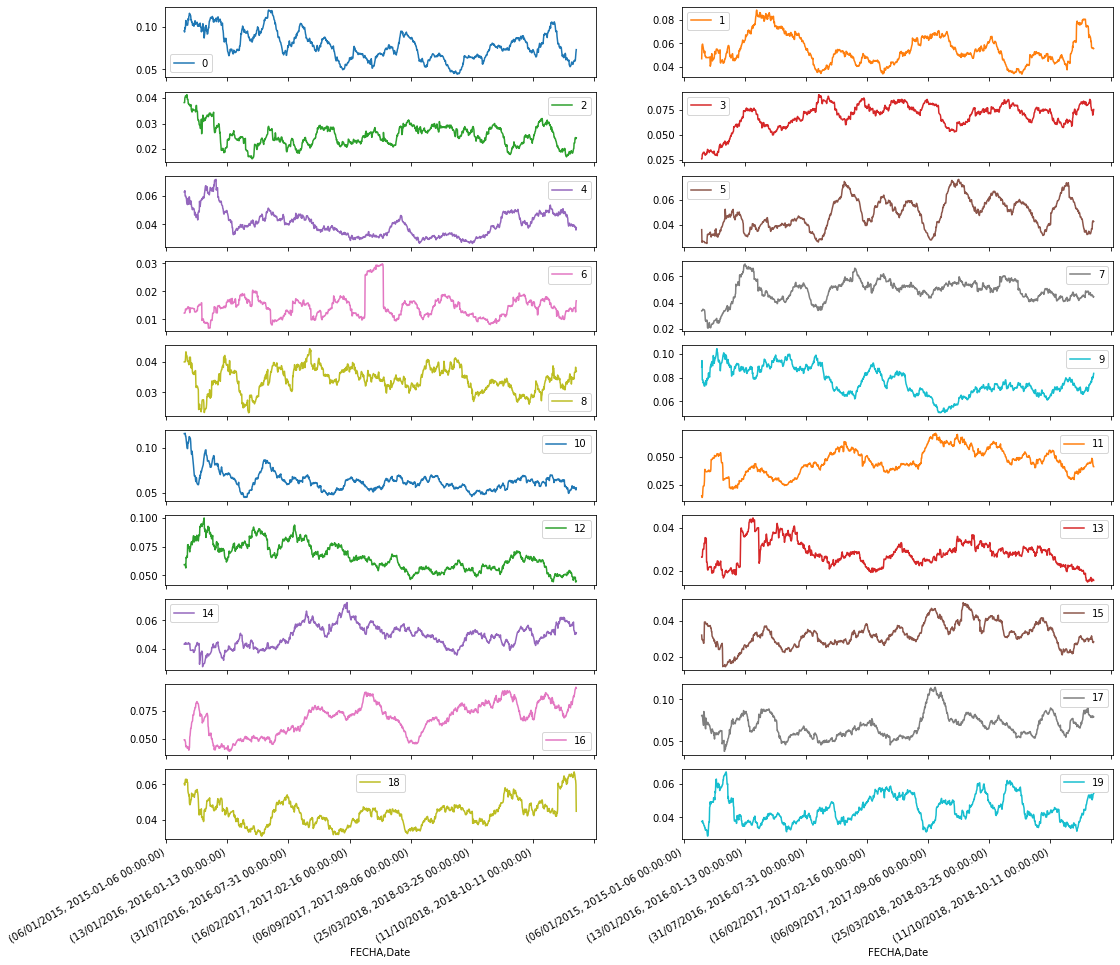

In [82]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [17, 17]

df_final['Date']= pd.to_datetime(df_final['FECHA'],format="%d/%m/%Y")
df_final = df_final.sort_values(by=['Date'])
#df_plot= df_final.drop('id',axis=1)
df_plot=df_final

df_plot.groupby(by=['FECHA','Date']).mean().sort_values(by=['Date']).rolling(window=60).mean().plot(subplots=True, layout=(10,2))
#df_plot.groupby(by=['FECHA','Date']).mean()


In [15]:
df_final.to_csv('MatrizTopics_LDA_index_fecha.csv',sep=';', index=None)

In [16]:
pd.read_csv('MatrizTopics_LDA_index_fecha.csv', delimiter=';')

,id,FECHA,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,Date
0,25469,06/01/2015,0.097412,0.000263,0.000263,0.000263,0.000263,0.609281,0.000263,0.000263,...,0.086479,0.000263,0.000263,0.000263,0.151781,0.000263,0.000263,0.051100,0.000263,2015-01-06
1,22075,26/02/2015,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,...,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,2015-02-26
2,24857,18/05/2015,0.000472,0.000472,0.000472,0.000472,0.000472,0.000472,0.000472,0.074744,...,0.000472,0.000472,0.000472,0.000472,0.000472,0.000472,0.916766,0.000472,0.000472,2015-05-18
3,22274,18/05/2015,0.323259,0.018012,0.000400,0.000400,0.394480,0.000400,0.000400,0.000400,...,0.000400,0.107583,0.000400,0.000400,0.000400,0.150667,0.000400,0.000400,0.000400,2015-05-18
4,22273,18/05/2015,0.365827,0.000833,0.000833,0.000833,0.376911,0.000833,0.000833,0.000833,...,0.000833,0.000833,0.000833,0.000833,0.000833,0.173666,0.000833,0.000833,0.000833,2015-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33332,28698,26/04/2019,0.531910,0.053907,0.000382,0.137731,0.000382,0.000382,0.000382,0.000382,...,0.000382,0.000382,0.000382,0.000382,0.019282,0.000382,0.000382,0.000382,0.000382,2019-04-26
33333,28714,26/04/2019,0.168850,0.000197,0.000197,0.156950,0.216614,0.000197,0.000197,0.000197,...,0.000197,0.028025,0.000197,0.000197,0.066700,0.000197,0.000197,0.000197,0.000197,2019-04-26
33334,28693,26/04/2019,0.000820,0.000820,0.000820,0.081181,0.000820,0.300056,0.000820,0.000820,...,0.000820,0.000820,0.000820,0.000820,0.191270,0.318320,0.000820,0.000820,0.000820,2019-04-26
33335,28703,26/04/2019,0.540667,0.000833,0.000833,0.075817,0.000833,0.000833,0.000833,0.000833,...,0.000833,0.000833,0.000833,0.000833,0.094516,0.000833,0.000833,0.000833,0.000833,2019-04-26
